## 1.기본 패키지 설정

In [1]:
#pip install konlpy
#pip install WordCloud
import numpy as np # numpy package
import pandas as pd # pandas package
import matplotlib.pyplot as plt
from konlpy.tag import Twitter  # pip install konlpy
from collections import Counter
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests

## 2.Crawling

In [17]:
search = "화장품 용기" # 검색어
title_list = []

In [18]:
url = f"https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query={search}&start=1"
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')
news_list = soup.select('ul.list_news > li > div > div > a')
#type(news_list)
# for news in news_list:
#     print(f"{i+1} : {news}")

In [19]:
def crawler(start, end):
    while True:
        if start > end:
            break
        url = f"https://search.naver.com/search.naver?sm=tab_hty.top&where=news&query={search}&start={start}"
        req = requests.get(url)
        soup = BeautifulSoup(req.text, 'html.parser')

        news_list = soup.select('ul.list_news > li > div > div > a')
        for index, news in enumerate(news_list):
            title_list.append(news['title'])
        start += 10

In [20]:
crawler(1, 300)

In [21]:
len(title_list)

300

In [22]:
title_list

["미백 화장품 효과 없다? 여태껏 효과 못 봤던 '이유'",
 '"자사 제품 용기에만 리필"…화장품 리필매장 확대 실효성 의문',
 "규제 풀린 '화장품 리필매장'…친환경 소비 앞장",
 "'예쁜 쓰레기 그만', 재활용 문제 발등에 불 떨어진 화장품업계",
 "규제 완화 속 화장품 리필 시대 '성큼'...실효성 물음표에 기업의 대답은?",
 '찾아보기 어렵던 ‘화장품 리필 매장’…앞으로 규제 풀린다',
 "뷰티업계, 화장품 리필 시대 '성큼'..규제 완화로 '친환경' 실천 가속",
 "[위드 코로나]③'답답한' 화장품업계, 돌파구는?",
 '스킨이데아 中서 2분 만에 10억 매출…‘손담비 화장품’',
 "'화장품 리필매장' 샌드박스 승인…전기차 충전 기계식 주차장도",
 '“펌텍코리아, 화장품 수요와 직결하는 화장품 용기 산업의 양호한 성장세”',
 '수소 실증특례로 탄소중립 혁신…화장품 리필매장도 손쉽게(종합)',
 '"예쁜 쓰레기는 옛말"…친환경에 힘주는 화장품 브랜드',
 '화장품도 무라벨 시대 열렸다…친환경 고민 지속',
 '경인 화장품 용기 제조업체 100여곳 줄도산 위기',
 '화장품컨설팅 (주)온유 홍울 대표, 공식 유튜브 채널에 사업스토리 공개',
 "화장품 용기가 퇴비로…'시타', 폐기물 제로 선언",
 "[최기자의 화장품털기] '간절기用' 남성화장품, 고영양 케어로 틈새 공략",
 '화장품 용기 뜯자 알약 ‘우수수’… 인천세관 마약탐지 현장을 가다 [S스토리]',
 '코스메카코리아, 에코패키지솔루션과 100% 분해 가능한 화장품 용기 제작',
 '[vitamin] 비타민 화장품으로 피부 심폐 소생',
 '"친환경이 맞긴 한데"…고민 깊은 화장품 업계',
 '에코패키지솔루션-코스메카코리아, 친환경 화장품 용기 개발 MOU',
 '조화로운 사회 구현... 화장품 업계, 거세지는 환경보호 바람',
 "설거지도 비누로? 플라스틱 용기 줄이는 '뽀드득 귀환'",
 '“화장품도 친환경”… MZ세대 겨냥 ‘클린뷰티’ 오프라인 승부',
 "제주도, 추석 

## 3.명사단어 추출

In [23]:
# 세종사전 실행
twitter = Twitter()

In [24]:
# 단어 리스트 만들기
word_list = title_list.copy()

In [25]:
# morph = twitter.pos(word_list[0]) # 문장별 단어로 분해하고, 단어별 형태소 정의
# print(morph)

In [26]:
# 형태소 분리 (KoNLpy 의 parser 이용)
sentences_tag = []

for sentence in word_list:
    morph = twitter.pos(sentence) # 문장별 단어로 분해하고, 단어별 형태소 정의
    sentences_tag.append(morph)
print(f"첫문장 형태소개수={len(sentences_tag[0])}, 문장갯수={len(sentences_tag)}")

첫문장 형태소개수=12, 문장갯수=300


In [27]:
# 명사만 추출
noun_list = []
tags = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']: # 명사만 추출
            noun_list.append(word)
print(f"추출된 명사 갯수 : {len(noun_list)}")

추출된 명사 갯수 : 2399


In [28]:
# noun_list = [n for n in noun_list if len(n) == 1]
# print(noun_list)

In [29]:
# 두 음절 이상만 추출
noun_list = [n for n in noun_list if len(n) > 1]
len(noun_list)

2178

In [30]:
# 단어이 빈도수 계산 (Python의 collections 모듈의 Counter 클래스 이둉)
counts = Counter(noun_list)
tags = counts.most_common(30)
tags

[('화장품', 267),
 ('용기', 180),
 ('친환경', 56),
 ('개발', 49),
 ('재활용', 41),
 ('기능', 29),
 ('업계', 28),
 ('내열', 26),
 ('케미칼', 23),
 ('플라스틱', 20),
 ('리필', 19),
 ('뷰티', 18),
 ('코리아', 18),
 ('소재', 18),
 ('환경', 17),
 ('표시', 17),
 ('성공', 17),
 ('샴푸', 16),
 ('한국', 14),
 ('페트병', 14),
 ('바이오', 13),
 ('코스', 12),
 ('분해', 12),
 ('콜마', 12),
 ('쓰레기', 11),
 ('사업', 11),
 ('포장', 11),
 ('포장재', 11),
 ('브랜드', 10),
 ('메카', 10)]

## 4.WordCloud 생성

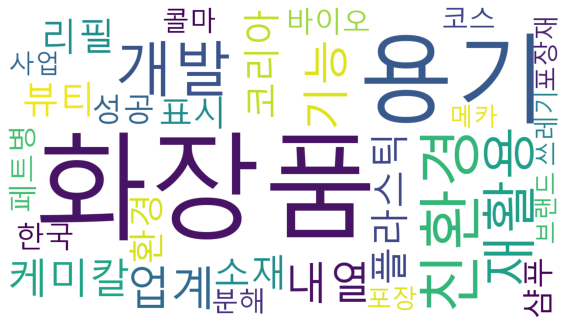

In [31]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                        background_color = 'white',
                        width = 1280,
                        height = 720)

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()